In [2]:
from netCDF4 import Dataset
import numpy as np
#import pymeteo.skewt as skewt
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
file = 'wrfout_d01_2012-05-30_00:00:00.nc'

In [4]:
nc = Dataset(file, 'r')

In [5]:
for i in nc.variables:
    print(i, nc.variables[i].shape)

Times (97, 19)
XLAT (97, 29, 29)
XLONG (97, 29, 29)
LU_INDEX (97, 29, 29)
ZNU (97, 59)
ZNW (97, 60)
ZS (97, 4)
DZS (97, 4)
VAR_SSO (97, 29, 29)
U (97, 59, 29, 30)
V (97, 59, 30, 29)
W (97, 60, 29, 29)
PH (97, 60, 29, 29)
PHB (97, 60, 29, 29)
T (97, 59, 29, 29)
HFX_FORCE (97,)
LH_FORCE (97,)
TSK_FORCE (97,)
HFX_FORCE_TEND (97,)
LH_FORCE_TEND (97,)
TSK_FORCE_TEND (97,)
MU (97, 29, 29)
MUB (97, 29, 29)
NEST_POS (97, 29, 29)
P (97, 59, 29, 29)
PB (97, 59, 29, 29)
FNM (97, 59)
FNP (97, 59)
RDNW (97, 59)
RDN (97, 59)
DNW (97, 59)
DN (97, 59)
CFN (97,)
CFN1 (97,)
THIS_IS_AN_IDEAL_RUN (97,)
P_HYD (97, 59, 29, 29)
Q2 (97, 29, 29)
T2 (97, 29, 29)
TH2 (97, 29, 29)
PSFC (97, 29, 29)
U10 (97, 29, 29)
V10 (97, 29, 29)
RDX (97,)
RDY (97,)
RESM (97,)
ZETATOP (97,)
CF1 (97,)
CF2 (97,)
CF3 (97,)
ITIMESTEP (97,)
XTIME (97,)
QVAPOR (97, 59, 29, 29)
QCLOUD (97, 59, 29, 29)
QRAIN (97, 59, 29, 29)
QICE (97, 59, 29, 29)
QSNOW (97, 59, 29, 29)
QGRAUP (97, 59, 29, 29)
QHAIL (97, 59, 29, 29)
QNCLOUD (97, 59, 29,

In [6]:
T = nc.variables['T']

In [7]:
xlong = nc.variables['XLONG']

In [8]:
xlat = nc.variables['XLAT']

In [9]:
xlat.shape

(97, 29, 29)

In [10]:
T.shape

(97, 59, 29, 29)

In [11]:
P = nc.variables['P']
P.shape

(97, 59, 29, 29)

In [12]:
len(T[3, :, 2, 2])

59

In [13]:
for dim in nc.dimensions:
    print(dim, nc.dimensions[dim])

Time <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'Time', size = 97

DateStrLen <class 'netCDF4._netCDF4.Dimension'>: name = 'DateStrLen', size = 19

west_east <class 'netCDF4._netCDF4.Dimension'>: name = 'west_east', size = 29

south_north <class 'netCDF4._netCDF4.Dimension'>: name = 'south_north', size = 29

bottom_top <class 'netCDF4._netCDF4.Dimension'>: name = 'bottom_top', size = 59

bottom_top_stag <class 'netCDF4._netCDF4.Dimension'>: name = 'bottom_top_stag', size = 60

soil_layers_stag <class 'netCDF4._netCDF4.Dimension'>: name = 'soil_layers_stag', size = 4

west_east_stag <class 'netCDF4._netCDF4.Dimension'>: name = 'west_east_stag', size = 30

south_north_stag <class 'netCDF4._netCDF4.Dimension'>: name = 'south_north_stag', size = 30



In [14]:
xlong[1,5,5]

-100.07627

## Calcular altura

`Z = (PH + PBH)/9.8`

# Richardson method

$$Ri(z_{i+1}) = \frac{g}{T_s} \frac{(\theta_{i+2} - \theta_i)(z_{i+2} - z_i)}{(V_{i+2} - V_i)^2}$$

# Parámetros

- $g = 9.8 \ m/s^2$

In [15]:
nc.variables['U']

<class 'netCDF4._netCDF4.Variable'>
float32 U(Time, bottom_top, south_north, west_east_stag)
    FieldType: 104
    MemoryOrder: XYZ
    description: x-wind component
    units: m s-1
    stagger: X
    coordinates: XLONG_U XLAT_U XTIME
unlimited dimensions: Time
current shape = (97, 59, 29, 30)
filling off

In [59]:
g = 9.8

In [57]:
T = nc.variables['T']
U = nc.variables['U']
V = nc.variables['V']
T2 = nc.variables['T2']
PH = nc.variables['PH']
PHB = nc.variables['PHB']

In [61]:
PH.shape

(97, 60, 29, 29)

In [58]:
PHB[:].shape

(97, 60, 29, 29)

In [64]:
def compute_height(PH, PBH):
    
    g = 9.8
    Z = []
    
    for i in range(0, len(PH)-1):
        
        z = (PH[i] + PBH[i])/g
        Z.append(z)
    
    return Z    

In [65]:
Z = compute_height(PH[4, :, 17, 13], PHB[4, :, 17, 13])

In [66]:
Z

[2191.9860092474487,
 2213.025350765306,
 2234.2075892857142,
 2255.4840959821427,
 2276.8193957270405,
 2298.1977439413263,
 2319.619140625,
 2341.0835857780612,
 2362.5904815051017,
 2405.7326211734694,
 2449.0465561224487,
 2492.5338807397957,
 2536.1975845025509,
 2624.0567203443875,
 2712.6496731505099,
 2801.9810267857142,
 2982.8995934311224,
 3167.0344387755099,
 3354.6018016581629,
 3545.8007812499995,
 3910.3902264030608,
 4287.9037786989793,
 4680.9677933673465,
 5088.2979910714284,
 5513.3362563775509,
 5956.6872608418362,
 6419.1414221938767,
 6905.6130420918362,
 7416.3034119897957,
 7957.4019451530603,
 8532.0304528061224,
 9144.296875,
 9804.4874043367345,
 10516.888552295917,
 11295.05500637755,
 12095.246332908162,
 12897.32063137755,
 13698.498086734693,
 14498.258928571428,
 15304.561543367347,
 16093.529974489795,
 16863.557079081631,
 17625.803571428569,
 18392.69132653061,
 19169.405293367345,
 19973.252551020407,
 20789.422831632652,
 21607.404336734693,
 22423.

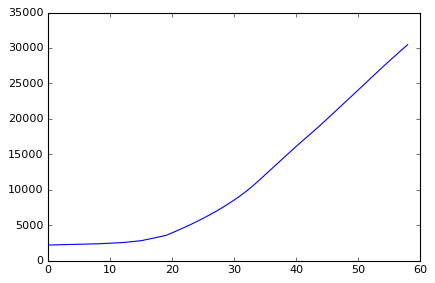

In [70]:
plt.plot(Z)

In [67]:
def compute_Richardson(T_s, θ, Z, u, v):
    g = 9.8
    Ri = []
    for i in range(1,len(θ)-1):
        Vu = np.sqrt(u[i+1] + v[i+1])
        Vd = np.sqrt(u[i-1] + v[i-1])
        ri = g / T_s * (θ[i+1] - θ[i-1])*(z[i+1] - z[i-1])/(Vu - Vd)**2
        Ri.append(ri)
    
    return Ri

In [75]:
import scipy.interpolate as interpo

In [76]:
interpo.LinearNDInterpolator 

scipy.interpolate.interpnd.LinearNDInterpolator

## Interpolación

In [79]:
xlat = nc.variables['XLAT']
xlong = nc.variables['XLONG']

xlat_u = nc.variables['XLAT_U']
xlong_u = nc.variables['XLONG_U']

xlat_v = nc.variables['XLAT_V']
xlong_v = nc.variables['XLONG_V']

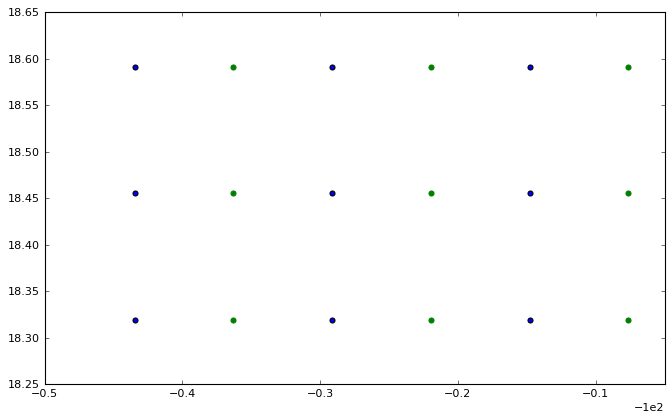

In [258]:
plt.figure(figsize=(10,6))
range_x = range(3,6)
plt.scatter(xlong_u[0,range_x, range_x], xlat_u[0, range_x, range_x])
#plt.scatter(xlong_v[0,range_x, range_x], xlat_v[0, range_x, range_x], color = 'r')
plt.scatter(xlong[0,range_x, range_x], xlat[0, range_x, range_x], color = 'g')

In [118]:
xlat_u[0, 3, 3:6]

array([ 18.31952667,  18.31952667,  18.31952667], dtype=float32)

In [109]:
u = nc.variables['U']

In [116]:
u[0, 10, 3, 3:6]

array([ 0.65301877,  1.08331299,  1.7920413 ], dtype=float32)

In [132]:
u_interp = np.interp(xlong[0, 3, :], xlong_u[0, 3, :], u[0, 10, 3, :])

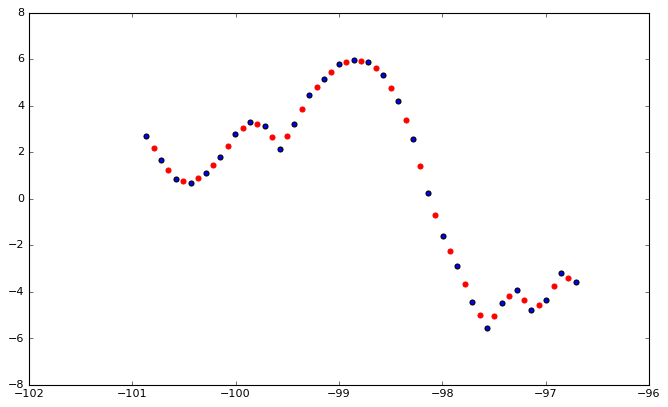

In [133]:
plt.figure(figsize=(10,6))
plt.scatter(xlong_u[0, 3, :], u[0, 10, 3, :])

plt.scatter(xlong[0, 3, :], u_interp, color='r')


In [135]:
u.shape

(97, 59, 29, 30)

In [159]:
YY = u[:]

In [169]:
u.shape

(97, 59, 29, 30)

In [164]:
YY[0,0,0,:] = np.zeros(30)

In [168]:
YY.shape

(97, 59, 29, 30)

In [177]:
a,b,c,d = u.shape

In [179]:
d

30

In [184]:
len(u[0,0,0,:])

30

In [192]:
np.interp(xlong[0,0,:], xlong_u[0,0,:], u[0, 3, 0, :]).shape

(29,)

In [197]:
u.shape

(97, 59, 29, 30)

In [198]:
xlong.shape

(97, 29, 29)

In [201]:
type(u[0,0,0,0])

numpy.float32

In [204]:
np.zeros((3,3,3), np.float32)

array([[[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]]], dtype=float32)

In [205]:
u.shape

(97, 59, 29, 30)

In [210]:
np.zeros((97, 59, 29, 30)).shape

(97, 59, 29, 30)

In [213]:
'''
    No sirve.
'''
def u_interpolate(XLONG, XLONG_U, U):
    
    tf, h, y, x = U.shape
    
    U_intep = np.zeros((tf, h, y, x-1), np.float32)
    
    #U_intep = np.zeros_like(U)
    
    for t in range(0,tf-1):
        for z in range(0, h-1):
            for i in range(0, y-1):
            
                U_intep[t, z, i, :] = np.interp(XLONG[t, i, :], XLONG_U[t, i, :], U[t, z, i, :])
                
    return U_intep

In [ ]:
u[]

In [215]:
u_interpol = u_interpolate(xlong, xlong_u, u)

In [216]:
import time

start = time.time()
u_interpol = u_interpolate(xlong, xlong_u, u)
end = time.time()
print(end - start)

82.18119215965271


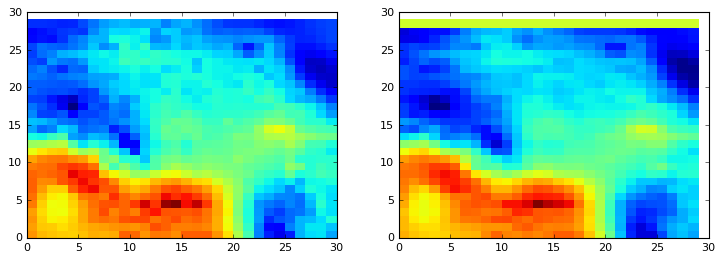

In [259]:
h = 0
fig = plt.figure(figsize=(11,8))
ax1 = fig.add_subplot(221)
ax1.pcolor(u[0,h, :, :])

ax2 = fig.add_subplot(222)
ax2.pcolor(u_interpol[0,h, :, :])


In [223]:
plt.figure(figure=(2,1))
plt.pcolor(u[0, 0, :, :])

TypeError: __init__() got an unexpected keyword argument 'figure'

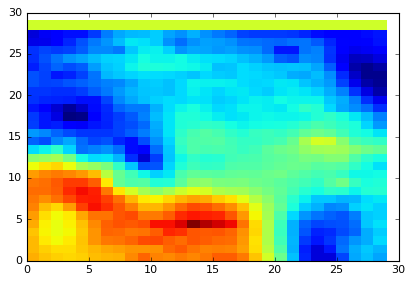

In [222]:
plt.pcolor(u_interpol[0,0, :, :])

## Scipy.interpolate

In [148]:
interpo.LinearNDInterpolator(xlong_u[0, :, :], u[0, 10, :, :], xlong[0, :, :])

TypeError: only length-1 arrays can be converted to Python scalars